# Histograms and K-Means Clustering

- Histograms
- K-Means Clustering

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [25]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/Cheetahs/4d5ff3bad0444108.jpg'

---
### Loading data

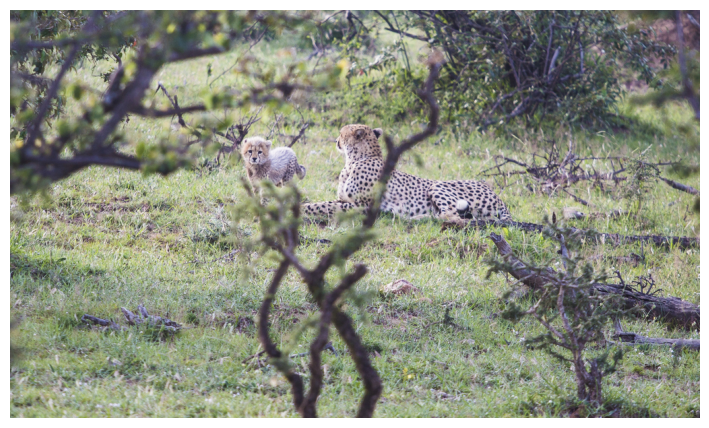

(607, 1024, 3)

In [37]:
img = cv2.imread(IMG_PATH)
imshow(img, size=15)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

---
### Histogram

```python
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

- **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

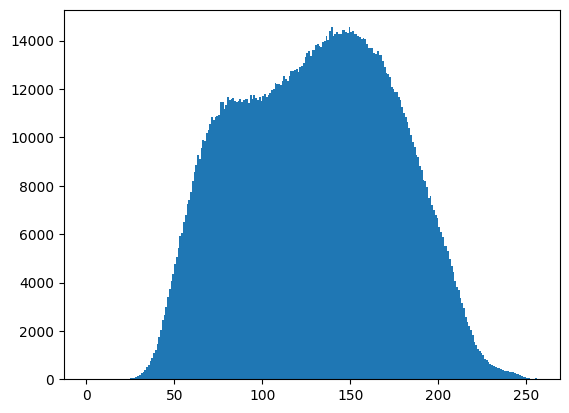

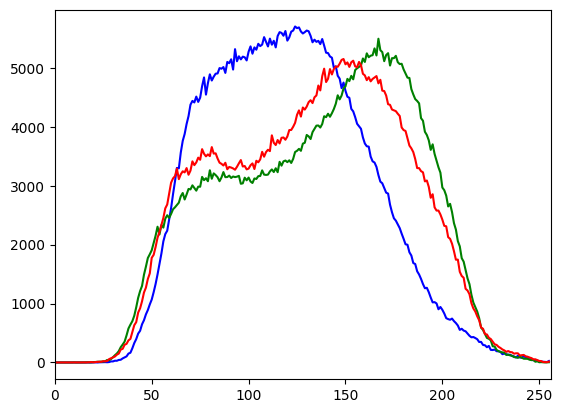

In [29]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

for idx, cur_color in enumerate(('b', 'g', 'r')):
    hist = cv2.calcHist([img], [idx], None, [256], [0, 256])
    plt.plot(hist, color=cur_color)
    plt.xlim([0, 256])
plt.show();

---
### K-Means Clustering

In [32]:
def centroid_histogram(clt):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # calcs amount of pixel in the clusters
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram 
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype="uint8")

    x_start = 0
    # iterate over the percentage and dominant color of each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
      end = x_start + (percent * 500)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end
    return bar

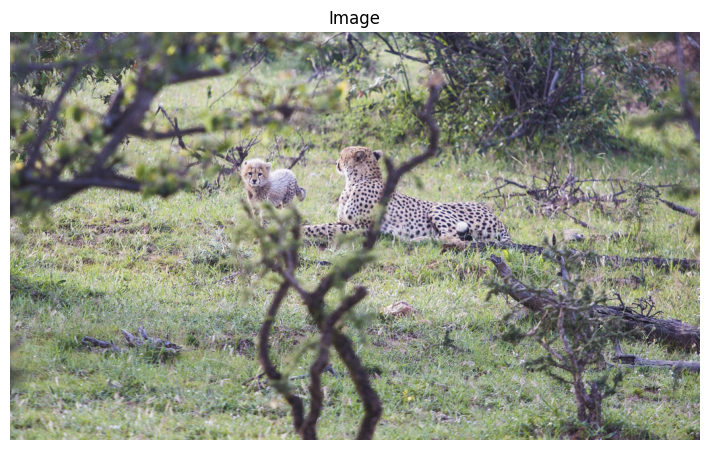

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


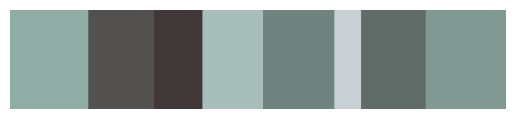

In [42]:
from sklearn.cluster import KMeans

img = cv2.imread(IMG_PATH)
imshow(img, "Image", size=15)

img = img.reshape( (img.shape[0]*img.shape[1], 3) )

number_of_clusters = 8
cluster = KMeans(number_of_clusters)
cluster = cluster.fit(img)

# get the amount of each color
hist = centroid_histogram(cluster)
# plot the color pixel amount of cluster center
bar = plot_colors(hist, cluster.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [43]:
hist

array([0.158253  , 0.13245212, 0.098813  , 0.12203492, 0.14303343,
       0.0540327 , 0.1293889 , 0.16199193])

In [44]:
bar

array([[[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]],

       [[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]],

       [[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]],

       ...,

       [[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]],

       [[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]],

       [[144, 173, 166],
        [144, 173, 166],
        [144, 173, 166],
        ...,
        [128, 153, 146],
        [128, 153, 146],
        [128, 153, 146]]

---